In [1]:
import pandas as pd
from math import pi
import numpy as np
import re

# Matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib.patches as patches

# Seaborn
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\TSmeitink\Google Drive\DDMA Hackathon\clusters_netherlands_kmeans.csv')[['id', 'clusters']]. \
    merge(pd.read_csv(r'C:\Users\TSmeitink\Google Drive\DDMA Hackathon\unscaled_hackaton_dataset.csv'), on='id'). \
    replace([-np.inf, np.inf], np.nan)

In [3]:
fields = ['id', 'indexed_price', 'build_year', 'use_surface', 'parcel_surface', 'score_totaal_2018', 'number_of_objects',
         'huishoudens_met_kinderen', 'gemiddelde_huishoudensgrootte', '0_tot_15', '15_tot_25',
         '25_tot_45', '45_tot_65', '65_+', 'omgevingsadressendichtheid', 'koopwoningen',
         'build_type', 'energy_label', 'migratieachtergrond', 'elektriciteitsverbruik', 'aardgasverbruik',
         'percentage_meergezinswoning', 'oppervlakte_land', 'personenautos_huishouden']
cat = ['build_type', 'energy_label']
num = [col for col in fields if col not in cat and col != 'id']

In [4]:
df = df[['id', 'clusters'] + num]

In [5]:
df.head()

,id,clusters,indexed_price,build_year,use_surface,parcel_surface,score_totaal_2018,number_of_objects,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,...,45_tot_65,65_+,omgevingsadressendichtheid,koopwoningen,migratieachtergrond,elektriciteitsverbruik,aardgasverbruik,percentage_meergezinswoning,oppervlakte_land,personenautos_huishouden
0,3595,green,400000.0,1900,299,576,-0.051487,1,0.184615,1.7,...,0.303609,0.29087,1195.0,0.4,0.097665,2190.0,1370.0,0.47,84.0,0.8
1,8647,green,155000.0,1889,79,125,-0.051487,1,0.184615,1.7,...,0.303609,0.29087,1195.0,0.4,0.097665,2190.0,1370.0,0.47,84.0,0.8
2,8648,green,300000.0,1920,258,1340,-0.051487,1,0.184615,1.7,...,0.303609,0.29087,1195.0,0.4,0.097665,2190.0,1370.0,0.47,84.0,0.8
3,11133,green,75000.0,1886,338,707,-0.051487,1,0.184615,1.7,...,0.303609,0.29087,1195.0,0.4,0.097665,2190.0,1370.0,0.47,84.0,0.8
4,11134,green,75000.0,2020,149,664,-0.051487,1,0.184615,1.7,...,0.303609,0.29087,1195.0,0.4,0.097665,2190.0,1370.0,0.47,84.0,0.8


In [19]:
df['clusters'].value_counts()

red       68364
gray      37019
yellow    20268
green     18651
pink      16752
blue      11250
orange     7475
black      6191
Name: clusters, dtype: int64

In [6]:
df_grouped = df.drop(columns='id').groupby('clusters').mean()

In [7]:
df_grouped.iloc[2]

indexed_price                    244139.111557
build_year                         1963.442584
use_surface                         103.314487
parcel_surface                      498.913315
score_totaal_2018                    -0.114756
number_of_objects                     6.617791
huishoudens_met_kinderen              0.326584
gemiddelde_huishoudensgrootte         2.078627
0_tot_15                              0.165159
15_tot_25                             0.118002
25_tot_45                             0.273446
45_tot_65                             0.271221
65_+                                  0.172961
omgevingsadressendichtheid         2258.653988
koopwoningen                          0.507501
migratieachtergrond                   0.289842
elektriciteitsverbruik             2541.730104
aardgasverbruik                    1162.733615
percentage_meergezinswoning           0.389322
oppervlakte_land                     78.174181
personenautos_huishouden              0.864764
Name: gray, d

In [8]:
df['huishoudens_met_kinderen'].describe()

count    185925.000000
mean          0.341944
std           0.116537
min           0.000000
25%           0.274431
50%           0.344828
75%           0.407216
max           1.000000
Name: huishoudens_met_kinderen, dtype: float64

In [9]:
df_grouped['huishoudens_met_kinderen']

clusters
black     0.110978
blue      0.396153
gray      0.326584
green     0.219524
orange    0.257532
pink      0.236252
red       0.372213
yellow    0.539380
Name: huishoudens_met_kinderen, dtype: float64

In [10]:
df_grouped.max()

indexed_price                    515931.978785
build_year                         1998.075488
use_surface                         189.788000
parcel_surface                     4082.853244
score_totaal_2018                     0.179089
number_of_objects                   117.531639
huishoudens_met_kinderen              0.539380
gemiddelde_huishoudensgrootte         2.756000
0_tot_15                              0.241156
15_tot_25                             0.278640
25_tot_45                             0.387936
45_tot_65                             0.338669
65_+                                  0.327774
omgevingsadressendichtheid         5953.554441
koopwoningen                          0.830839
migratieachtergrond                   0.494992
elektriciteitsverbruik             4177.750000
aardgasverbruik                    2269.312807
percentage_meergezinswoning           0.879013
oppervlakte_land                    893.436978
personenautos_huishouden              1.497118
dtype: float6

In [11]:
df_grouped.min()

indexed_price                    244139.111557
build_year                         1932.469230
use_surface                          83.725217
parcel_surface                      433.947109
score_totaal_2018                    -0.198154
number_of_objects                     1.720889
huishoudens_met_kinderen              0.110978
gemiddelde_huishoudensgrootte         1.468002
0_tot_15                              0.076297
15_tot_25                             0.092639
25_tot_45                             0.171964
45_tot_65                             0.178722
65_+                                  0.089518
omgevingsadressendichtheid          430.460356
koopwoningen                          0.349666
migratieachtergrond                   0.101634
elektriciteitsverbruik             2101.803249
aardgasverbruik                     872.725487
percentage_meergezinswoning           0.091495
oppervlakte_land                     44.070021
personenautos_huishouden              0.450729
dtype: float6

In [16]:
def radar_plot(group):
    categories = list(df_grouped)
    values = np.array(df_grouped[df_grouped.index == group])[0]
    values_positive = np.array([item - m for item, m in zip(values, df_grouped.min())])
    value_axes = [i/m for i, m in zip(values_positive, (df_grouped.max() - df_grouped.min()))]
    print(np.round(value_axes, 2))
    
    fig = plt.figure(figsize=(10, 10), facecolor='white')
    ax = plt.subplot(111, polar=True)
    t = np.arange(0, 2 * np.pi, 2 * np.pi / len(categories))
    plt.xticks(t, [])
    plt.yticks(np.arange(0, 1.2, 0.2), [])

    points = [(x, y) for x, y in zip(t, value_axes)]
    points.append(points[0])
    points = np.array(points)

    codes = [path.Path.MOVETO,] + \
            [path.Path.LINETO,] * (len(value_axes)-1) + \
            [path.Path.CLOSEPOLY ]

    _path = path.Path(points, codes)
    _patch = patches.PathPatch(_path, fill=True, facecolor=group)
    ax.add_patch(_patch)
    _patch = patches.PathPatch(_path, fill=False, linewidth = 2)
    ax.add_patch(_patch)
    
    plt.ylim(0, 1.2)

    plt.scatter(points[:,0], points[:,1], linewidth=2, s=50, color='white', 
            edgecolor='black', zorder=10)
    for i, v in enumerate(categories):
        angle_rad = i/float(len(categories))*2*np.pi
        ha = "right"
        if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: 
            ha = "left"
        else: 
            ha="right"
        plt.text(angle_rad, 1.3, v, size=14, horizontalalignment=ha,
                verticalalignment="center")
        if v in ['omgevingsadressendichtheid', 'build_year', 'oppervlakte_land', 'use_surface', 'parcel_surface',
                 'elektriciteitsverbruik', 'aardgasverbruik', 'number_of_objects', 'gemiddelde_huishoudensgrootte']:
            txt = f"{int(round(list(values)[i]))}"
        elif v == 'indexed_price':
            txt = f"€{list(values)[i]:.2f}"
        elif v == 'score_totaal_2018':
            txt = f"{list(values)[i]:.2f}"
        else:
            txt = f"{int(round(list(values)[i]*100))}%"

        plt.text(angle_rad, points[:,1][i]+0.05, txt, size=12,
                 horizontalalignment=ha, verticalalignment="center")

    plt.savefig(f"output/radar-chart-{group}.png", bbox_inches='tight')
    plt.tight_layout()
    plt.show();

[0.34 0.   0.2  0.1  0.6  0.11 0.   0.   0.   1.   0.85 0.   0.09 0.64
 0.   0.47 0.05 0.16 0.81 0.   0.  ]


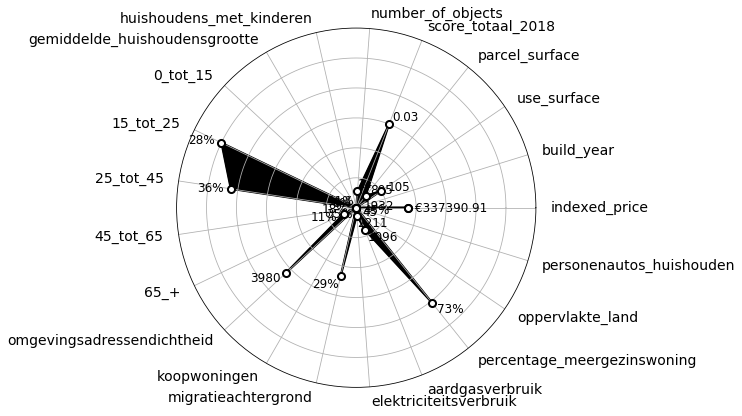

[1.   0.38 1.   0.4  1.   0.   0.67 0.81 0.47 0.18 0.   1.   0.5  0.
 1.   0.   1.   1.   0.   1.   1.  ]


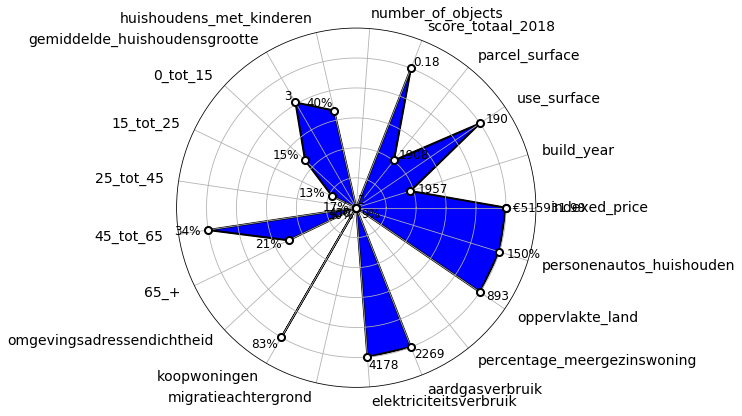

[0.   0.47 0.18 0.02 0.22 0.04 0.5  0.47 0.54 0.14 0.47 0.58 0.35 0.33
 0.33 0.48 0.21 0.21 0.38 0.04 0.4 ]


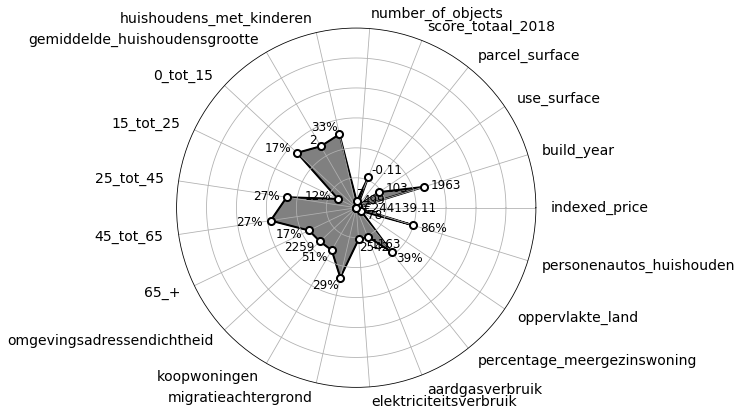

[0.21 0.44 0.37 0.1  0.63 0.07 0.25 0.3  0.2  0.   0.15 0.55 1.   0.26
 0.33 0.21 0.19 0.27 0.55 0.05 0.44]


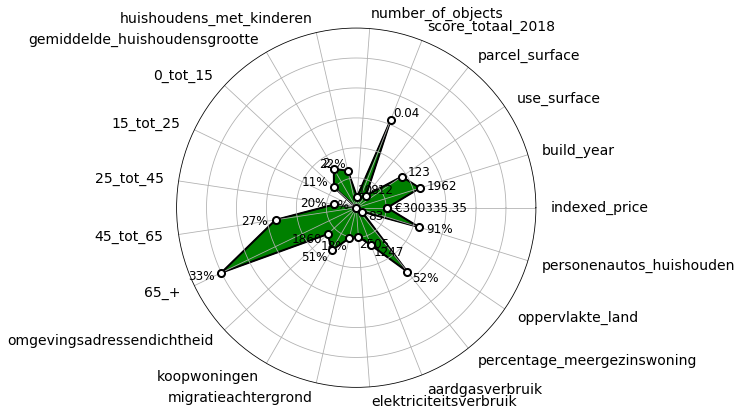

[0.05 0.78 0.   1.   0.   1.   0.34 0.32 0.42 0.17 0.66 0.38 0.37 0.5
 0.1  0.84 0.11 0.   0.86 0.03 0.25]


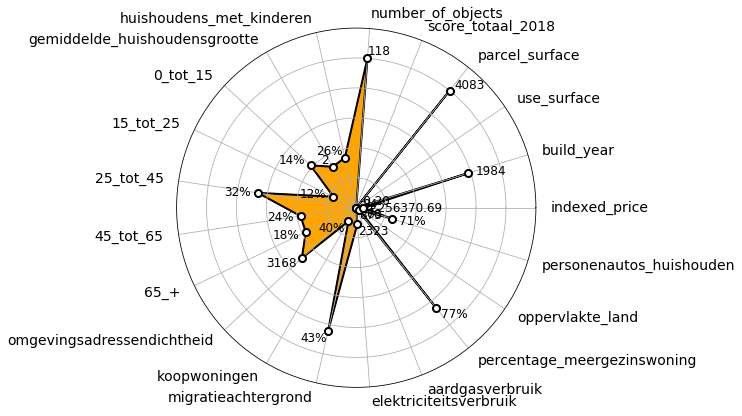

[0.55 0.08 0.02 0.07 0.09 0.07 0.29 0.25 0.4  0.18 1.   0.32 0.11 1.
 0.01 1.   0.   0.09 1.   0.   0.06]


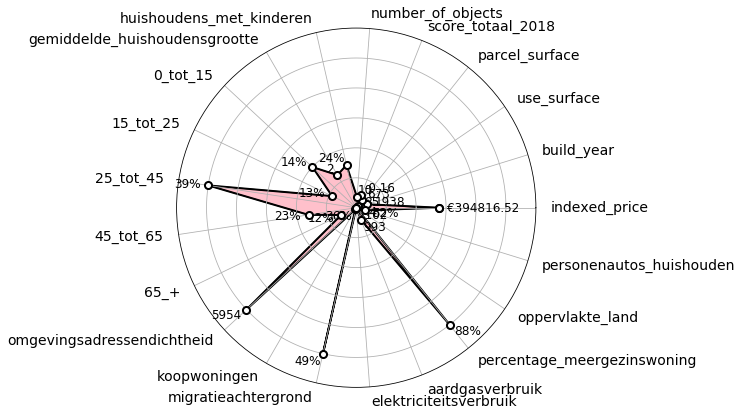

[0.21 0.6  0.45 0.   0.75 0.01 0.61 0.67 0.5  0.11 0.17 0.82 0.51 0.11
 0.76 0.07 0.46 0.44 0.06 0.12 0.73]


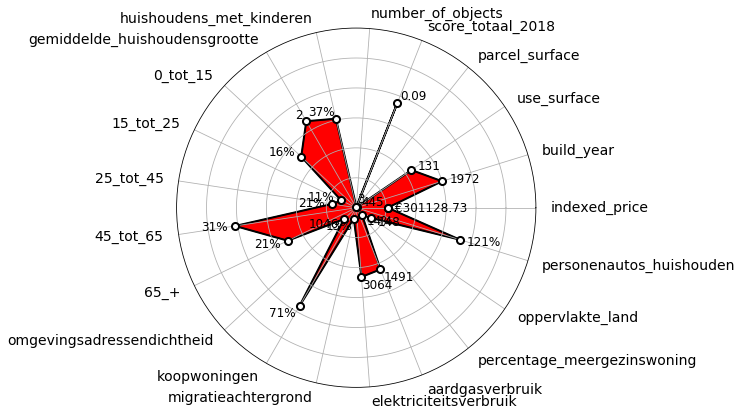

[0.41 1.   0.5  0.   0.89 0.02 1.   1.   1.   0.15 0.5  0.57 0.   0.15
 0.86 0.24 0.57 0.19 0.08 0.07 0.73]


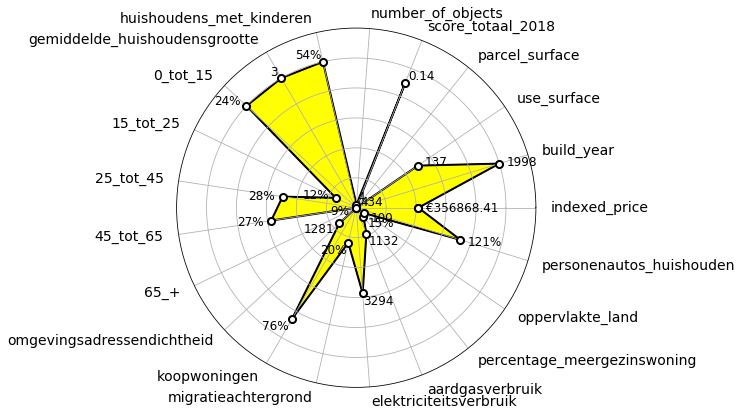

In [17]:
for group in df_grouped.index.values:
    radar_plot(group)